In [3]:
import tensorflow as tf 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:



# elegir el directorio donde se encuentran las imágenes de entrenamiento
train_dir = './capturas'

# crear una instancia de ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #rotation_range=40,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #shear_range=0.2,
                                   
                                   zoom_range=0.2,
                                   horizontal_flip=True)#,
                                   #fill_mode='nearest')

# configurar el generador con el directorio correcto
train_gen = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(256,256),  # indicamos al generador que cmabie la resolución a 256x256 píxeles
    class_mode='binary')  # indicamos que es un dataset para clasificación binaria

# crear el modelo
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(33, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

#tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historia = model.fit(
      train_gen,
      epochs=8,
      verbose=1)

model.save('./modelos/modelo_intento3_8epochs.h5')

Found 308 images belonging to 2 classes.
Epoch 1/8
10/10 [==============================] - 34s 3s/step - loss: 0.6919 - accuracy: 0.4838
Epoch 2/8
10/10 [==============================] - 34s 3s/step - loss: 0.4643 - accuracy: 0.8182
Epoch 3/8
10/10 [==============================] - 34s 3s/step - loss: 0.3010 - accuracy: 0.8604
Epoch 4/8
10/10 [==============================] - 33s 3s/step - loss: 0.1759 - accuracy: 0.9448
Epoch 5/8
10/10 [==============================] - 33s 3s/step - loss: 0.1027 - accuracy: 0.9643
Epoch 6/8
10/10 [==============================] - 34s 3s/step - loss: 0.1398 - accuracy: 0.9481
Epoch 7/8
10/10 [==============================] - 35s 3s/step - loss: 0.0965 - accuracy: 0.9675
Epoch 8/8
10/10 [==============================] - 34s 3s/step - loss: 0.1244 - accuracy: 0.9513


In [1]:
cara=cv.imread("./capturas/conbarbijo/conbarbijo_0.jpg")

cara_gray = cv.cvtColor(cara, cv.COLOR_RGB2GRAY)
            # hacer un resize a 96, 96
cara_chica = cv.resize(cara, (256, 256))
            # transformar el array a una dimensionalidad compatible con el modelo
#cara_input = np.array([cara_chica.reshape(96, 96, 1)]) / 255

cara_input =np.array([cara_chica.reshape(256,256,3)])            # predecir
cara_input.shape

NameError: name 'cv' is not defined

In [4]:
prd1=model.predict(cara_input)

In [5]:
prd1

array([[0.]], dtype=float32)

In [6]:
print(prd1)

[[0.]]


In [7]:
cara=cv.imread("capturas/sinbarbijo/sinbarbijo_0.jpg")
#input_cara.resize(256,256,3

cara_gray = cv.cvtColor(cara, cv.COLOR_RGB2GRAY)
            # hacer un resize a 96, 96
cara_chica = cv.resize(cara, (256, 256))
            # transformar el array a una dimensionalidad compatible con el modelo
#cara_input = np.array([cara_chica.reshape(96, 96, 1)]) / 255

cara_input =np.array([cara_chica.reshape(256,256,3)])            # predecir
cara_input.shape

(1, 256, 256, 3)

In [8]:
prd2=model.predict(cara_input)

In [9]:
prd2[0]

array([0.], dtype=float32)

In [10]:
cara=cv.imread("capturas/fondo/fondo_0.jpg")
#input_cara.resize(256,256,3

cara_gray = cv.cvtColor(cara, cv.COLOR_RGB2GRAY)
            # hacer un resize a 96, 96
cara_chica = cv.resize(cara, (256, 256))
            # transformar el array a una dimensionalidad compatible con el modelo
#cara_input = np.array([cara_chica.reshape(96, 96, 1)]) / 255

cara_input =np.array([cara_chica.reshape(256,256,3)])            # predecir
cara_input.shape
prd3=model.predict(cara_input)
prd3

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [11]:
prediccion_conbarbijo=[]
indice_conbarbijo=[]
for i in range(201):
    #print(f'{i}')
    cara=cv.imread(f'capturas/conbarbijo/conbarbijo_{i}.jpg')
    #input_cara.resize(256,256,3
                # hacer un resize a 96, 96
    cara_chica = cv.resize(cara, (256, 256))
                # transformar el array a una dimensionalidad compatible con el modelo
    #cara_input = np.array([cara_chica.reshape(96, 96, 1)]) / 255

    cara_input =np.array([cara_chica.reshape(256,256,3)])            # predecir
    cara_input.shape
    prd3=model.predict(cara_input)
    prediccion_conbarbijo.append(prd3[0][0])
    indice_conbarbijo.append(i)

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
prediccion_sinbarbijo=[]
indice_sinbarbijo=[]
for i in range(201):
    #print(f'{i}')
    cara=cv.imread(f'capturas/sinbarbijo/sinbarbijo_{i}.jpg')
    #input_cara.resize(256,256,3
                # hacer un resize a 96, 96
    cara_chica = cv.resize(cara, (256, 256))
                # transformar el array a una dimensionalidad compatible con el modelo
    #cara_input = np.array([cara_chica.reshape(96, 96, 1)]) / 255

    cara_input =np.array([cara_chica.reshape(256,256,3)])            # predecir
    cara_input.shape
    prd3=model.predict(cara_input)
    prediccion_sinbarbijo.append(prd3[0][1])
    indice_sinbarbijo.append(i)

In [13]:
prediccion_fondo=[]
indice_fondo=[]
for i in range(201):
    
    cara=cv.imread(f'capturas/fondo/fondo_{i}.jpg')
    
    cara_chica = cv.resize(cara, (256, 256))
                # transformar el array a una dimensionalidad compatible con el modelo
    #cara_input = np.array([cara_chica.reshape(96, 96, 1)]) / 255

    cara_input = np.array([cara_chica.reshape(256,256,3)])           
    prd3 = model.predict(cara_input)
    prediccion_fondo.append(prd3[0][2])
    indice_fondo.append(i)

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [14]:
prediccion_sinbarbijo[0:8]

[]

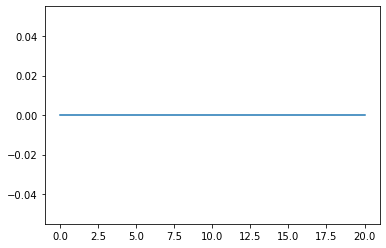

In [15]:
fig = plt.figure()
ax = plt.axes()
xcb = indice_conbarbijo
ycb = prediccion_conbarbijo

xsb = indice_sinbarbijo
ysb = prediccion_sinbarbijo

xf = indice_fondo
yf = prediccion_fondo

ax.plot(xcb, ycb);
ax.plot(xsb,ysb);
ax.plot(xf,yf);

In [4]:
model= tf.keras.models.load_model('../intento3/modelos/modelo_intento3_8epochs.h5')

In [5]:
predicciones=[[],[]]
indices=[]
unos=[]
for i in range(5):
    
    #cara_f=cv.imread(f'capturas/fondo/fondo_{i}.jpg')
    cara_cb=cv.imread(f'../intento3/capturas/conbarbijo/conbarbijo_{i}.jpg')
    cara_sb=cv.imread(f'../intento3/capturas/sinbarbijo/sinbarbijo_{i}.jpg')
    
    #cara_chica_f = cv.resize(cara_f, (256, 256))
    cara_chica_cb = cv.resize(cara_cb, (256, 256))
    cara_chica_sb = cv.resize(cara_sb, (256, 256))

    #cara_input_f = np.array([cara_chica_f.reshape(256,256,3)])           
    cara_input_cb = np.array([cara_chica_cb.reshape(256,256,3)])  
    cara_input_sb = np.array([cara_chica_sb.reshape(256,256,3)])  

    #pred_f = model.predict(cara_input_f)
    pred_cb = model.predict(cara_input_cb)
    pred_sb = model.predict(cara_input_sb)


    predicciones[0].append(pred_cb[0])
    predicciones[1].append(pred_sb[0])
    #predicciones[2].append(pred_sb[0])
    
    unos.append(pred_cb[0][0])
    unos.append(pred_sb[0][0])
    
    #unos.append(pred_sb[0][2])
    indices.append(i)

In [7]:
predicciones

[[array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32)],
 [array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32),
  array([0.], dtype=float32)]]